In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('logreg1',names=['Exam1', 'Exam2', 'Admitted'])

In [83]:
# df.info()
df.describe()

,Exam1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [4]:
df.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [148]:
X = np.array([df['Exam1'] , df['Exam2']])

In [149]:
y = np.array(df['Admitted']).reshape(1,100)

In [150]:
def sigma(x):
    
    s = 1/(1 + np.exp(-x))
    
    return s

In [151]:
def initialize(X):
    #
    #To initialize the weights and bias.
    #Here two features so nx = 2
    #Hence Weight matrix must be (2,1)
    n = X.shape[0]
    w = np.zeros((n,1))
    b = 0
    
    return w , b

In [152]:
def fpropogate(X,w,b):
    
    # w - (2X1)
    # X = (2Xm)
    # Z = w'.X + b ==> (1x2).(2,m) + 0 ==> (1,m)
    
    Z = np.dot(w.T , X) + b
    
    A = sigma(Z)
    
    return A

In [89]:
def cost(X,y,w,b):
    
#     w,b = initialize(X)
    
    A = fpropogate(X,w,b)
    
    L = y*np.log(A) + (1-y)*np.log(1-A)
    
    m = X.shape[1]
    
    J = (-1/m)*np.sum(L)
    
    return J

In [153]:
def gradient(X,y,w,b):
    
    #A ==> (1,m) <== Y
    #dw = dj/dw ==> (2,1)
    #X ==> (2,m)
    #dw ==> (2,m).(m,1)
    
    m = X.shape[1]
    
#     w,b = initialize(X)
    
    A = fpropogate(X,w,b)
    
    #dJ/dw
    dw = (1/m)*np.dot(X, (A - y).T)
    
    #dJ/db
    db = (1/m)*np.sum(A-y)
    
    return dw , db
    

In [182]:
def backprop(X,y,w,b,epoch):
    
    m = X.shape[1]
    
 
    
    #learning rate : a = 0.001
    a = 0.05
    
    for i in range(epoch):
        
        dw , db = gradient(X,y,w,b)
        
        w = w - a*dw
        
        b = b - a*db
    
    
    w_final = w
    b_final = b
    
    return w_final , b_final

In [183]:
# from scipy.optimize import minimize

w , b = initialize(X)

In [184]:
wf , bf = backprop(X,y,w,b,100000)

In [171]:
# wf , bf = backprop(X,y,w,b,100000)

In [176]:
# cost(X,y,wf,bf)
def predict(X,w = wf, b = bf):
    
    yp = np.zeros((1,100))
    
    Z = np.dot(w.T , X) + b
    A = sigma(Z)
    
    for i in range(100):
        
        if A[0,i] >=0.50:
            yp[0,i] = 1
        else:
            yp[0,i] = 0
    return yp

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
model = LogisticRegression()

In [139]:
Xt = df[['Exam1' , 'Exam2']]

yt = df['Admitted']

In [127]:
model = LogisticRegression()

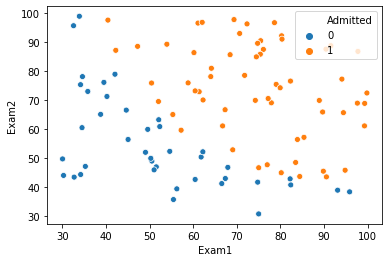

In [128]:
sns.scatterplot(df['Exam1'] , df['Exam2'] , hue=df['Admitted'])

In [129]:
model.fit(X,y)

LogisticRegression()

In [136]:
model.predict([[70,60]])

array([1], dtype=int64)

In [185]:
yp = predict(X)

In [186]:
df['Pred'] = yp.reshape(100,1)

In [187]:
df

,Exam1,Exam2,Admitted,Pred
0,34.623660,78.024693,0,0.0
1,30.286711,43.894998,0,0.0
2,35.847409,72.902198,0,0.0
3,60.182599,86.308552,1,0.0
4,79.032736,75.344376,1,1.0
...,...,...,...,...
95,83.489163,48.380286,1,0.0
96,42.261701,87.103851,1,0.0
97,99.315009,68.775409,1,1.0
98,55.340018,64.931938,1,0.0
